# Underactuated cartpole control with iLQR, MPPI
This example shows model predictive control to swing up the underactuated cartpole.

![Underactuated cartpole control with iLQR](./cartpole-ilqr.gif)

## Problem

**Model.** The "cartpole" is a free pendulum on a linear cart.  The input to the system is a force on the cart $f$.

$$
m l \ddot{p} \cos(\theta) + m l^2 \ddot{\theta} - m g l \sin(\theta) = 0 \\
(m + m_c) \ddot{p} + m l \ddot{\theta} \cos(\theta) - m l \dot{\theta}^2 \sin(\theta) = f
$$

where $\theta = 0$ is the angle of the pendulum when completely upright, and $p$ is the position of the cart.  The state of the system is $x = (p, \theta, \dot{p}, \dot{\theta})^\top$.  Parameters are the mass of the pendulum at the tip $m = 0.15$ kg, length of the pendulum $l = 0.75$ m, acceleration due to gravity $g = 9.8$ m/s , and the mass of the cart $m_c=1$ kg.

**Control.** The objective is to move the cart so that the pendulum will stand up vertically.  This is a classic controls and RL problem and is a typical benchmark test for new algorithms.  We use the quadratic cost function

$$
J = \sum_{i=1}^{N} x_i^\top Q x_i + \sum_{i=1}^{N-1} r u_i^2
$$

where $Q = \text{diag}(1.25, 6, 12, 0.25)$ is chosen to drive the system states 0, and the penalty $r = 0.01$ tradeoffs the input magnitude.

**Comparison to MPPI.**  The video above shows iLQR which works well for this problem.  Examining MPPI (sampling-based control) in the video below, the algorithm finds a control that achieves the desired swing up behavior using noise.  Note that due to stochastic nature of the algorithm, a solution is not always found.

![Underactuated cartpole control with MPPI](./cartpole-mppi.gif)

## Example

To run the example, build and install the C++ and Python libraries from the main README instructions.  Start the docker container.
```
# Run the experiment
cd /libsia/bin
./example-cartpole --datafile /libsia/data/cartpole.csv --algorithm ilqr

# Run the python script
cd /libsia/examples/cartpole
python cartpole.py --help
python cartpole.py --datafile /libsia/data/cartpole.csv
```

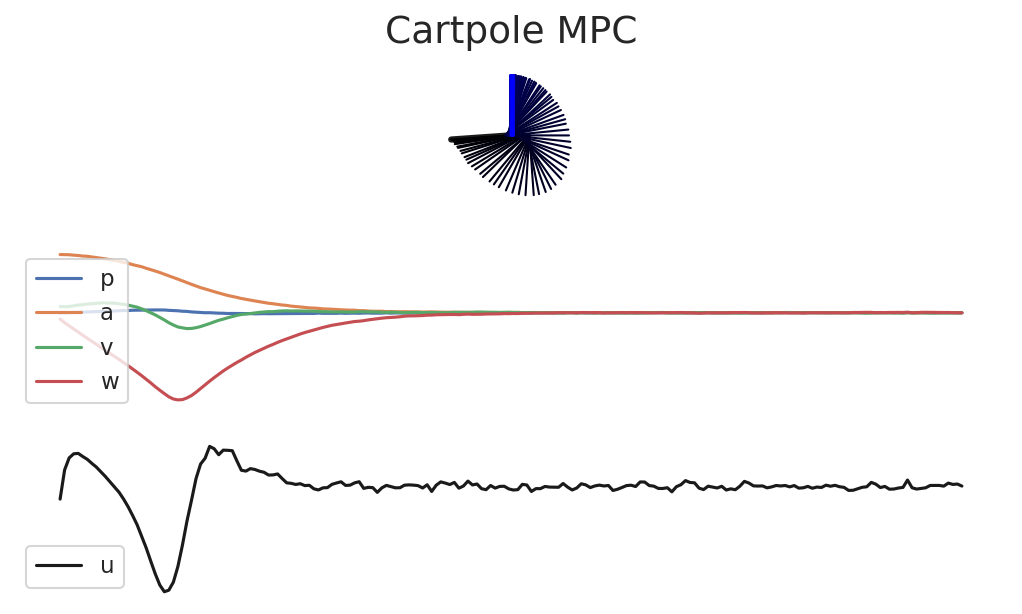

In [1]:
# This example imports data generated by the executable
from cartpole import plot_cartpole_trajectory

# This is the same as running the python script
plot_cartpole_trajectory(datafile="/libsia/data/cartpole.csv",
                         animate=False,
                         trace=True,
                         video_name="cartpole-animated.mp4",
                         dpi=150,
                         fps=30,
                         clean_axes=True)

## Multiple demonstrations

In [2]:
import subprocess

num_trials = 10
datafiles = ["/libsia/data/cartpole-{}.csv".format(i) for i in range(num_trials)]

# Peform n trials with an expert policy
for datafile in datafiles:
    print("Running case {}".format(datafile))
    subprocess.call(["/libsia/bin/example-cartpole",
                     "--measurement_noise",
                     "1e-6",
                     "--process_noise",
                     "1e-6",
                     "--datafile", 
                     datafile])

Running case /libsia/data/cartpole-0.csv
Running case /libsia/data/cartpole-1.csv
Running case /libsia/data/cartpole-2.csv
Running case /libsia/data/cartpole-3.csv
Running case /libsia/data/cartpole-4.csv
Running case /libsia/data/cartpole-5.csv
Running case /libsia/data/cartpole-6.csv
Running case /libsia/data/cartpole-7.csv
Running case /libsia/data/cartpole-8.csv
Running case /libsia/data/cartpole-9.csv
